# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

###
# inside acquire.py script:
from env import uname, pwd, host
import env
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing

## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [6]:
df = pd.read_csv('student_grades.csv')
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


In [7]:
df.exam3.value_counts()

96.0    16
78.0    16
75.0    15
95.0     8
87.0     8
86.0     8
85.0     8
94.0     8
79.0     8
70.0     8
Name: exam3, dtype: int64

In [9]:
df.exam3.replace(r'^\s*$',np.nan,regex=True)

0      95.0
1      96.0
2      87.0
3      86.0
4      96.0
       ... 
99     78.0
100    79.0
101    70.0
102    75.0
103    78.0
Name: exam3, Length: 104, dtype: float64

In [14]:
df['exam3'] = df.exam3.replace(r'^\s*$',np.nan,regex=True)

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    float64
 4   final_grade  102 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.8 KB


In [18]:
df = df.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [20]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [21]:
train_val, test = train_test_split(df,train_size=0.8,random_state=1349)
train, validate = train_test_split(train_val,train_size=0.7,random_state=1349)

In [22]:
train.shape,validate.shape,test.shape

((56, 5), (25, 5), (21, 5))

In [23]:
columns = train.drop(columns=['final_grade','student_id']).columns.to_list()

In [24]:
train_scaled = train.copy()

In [25]:
from sklearn.preprocessing import MinMaxScaler
train_scaled = MinMaxScaler().fit_transform(train.drop(columns=['final_grade','student_id']))

In [ ]:
# Use our wrangle function to acquire and prepare our data.


In [26]:
#look at your data!
X_train, y_train = train[columns],train[['final_grade']]

In [29]:
train.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
61,62,62,70,79,70
24,25,57,65,75,65
102,103,57,65,75,65
50,51,57,65,75,65


In [27]:
X_train.head()

,exam1,exam2,exam3
0,100,90,95
61,62,70,79
24,57,65,75
102,57,65,75
50,57,65,75


In [ ]:
# verify student_id is unique


#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

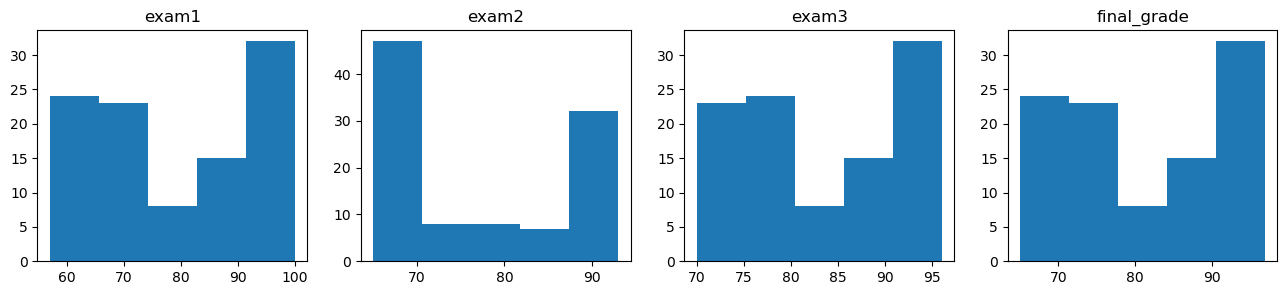

In [30]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [ ]:
#train, validate, test split


## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no there linear correlation between exam1 and final_grade
- ${H_a}$:  there is a linear correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [31]:
# create the correlation matrix using pandas .corr()
exam_corr = train.drop(columns='student_id').corr(method='spearman')

In [32]:
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.889858,0.906581,0.970938
exam2,0.889858,1.000000,0.899940,0.830510
exam3,0.906581,0.899940,1.000000,0.922010
final_grade,0.970938,0.830510,0.922010,1.000000


<AxesSubplot:>

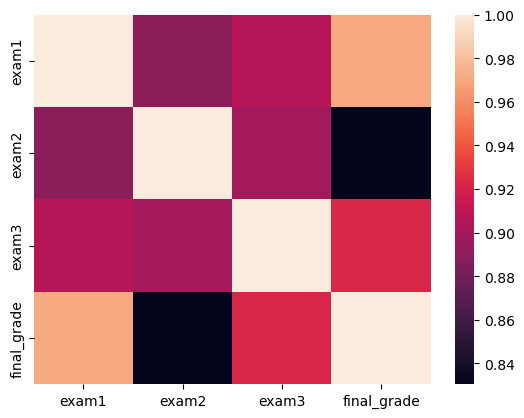

In [33]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

<AxesSubplot:>

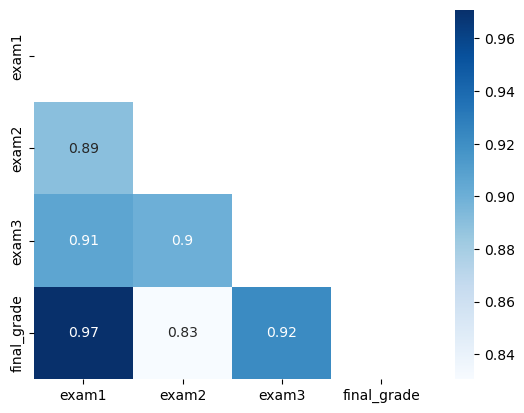

In [38]:
sns.heatmap(exam_corr,cmap='Blues',annot=True,mask=np.triu(exam_corr))

In [ ]:
# pass my correlation matrix to Seaborn's heatmap with customization


<AxesSubplot:>

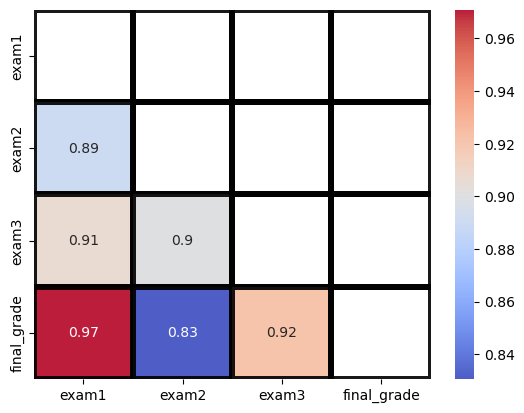

In [39]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(exam_corr,cmap='coolwarm',annot=True,mask=np.triu(exam_corr),**kwargs)


### Test Hypothesis

In [41]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r,p = spearmanr(train.exam1,train.final_grade)

In [43]:
r,p
#REJECT NULL-there is an ordinal relationship between EXAM1 and FINAL

(0.9709376020352475, 3.25228065357342e-35)

#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

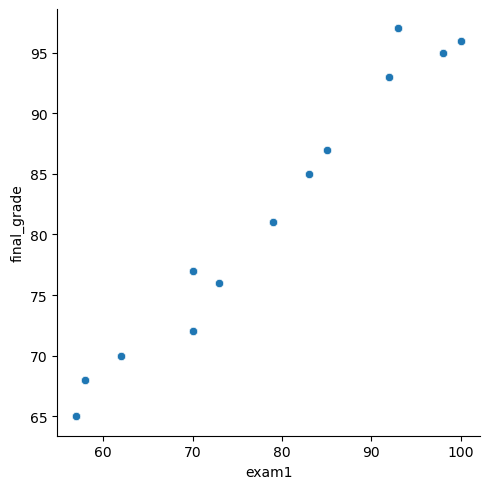

In [47]:
sns.relplot(data=train,
           x='exam1',
           y='final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

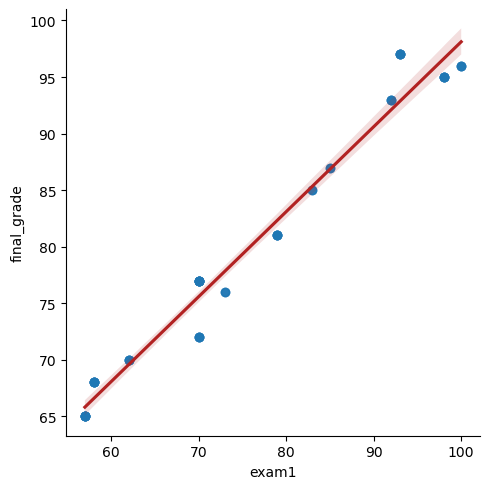

In [48]:
# I can really pop that line color if I want
sns.lmplot(data=train,
           x='exam1',
           y='final_grade',
          line_kws={'color':'firebrick'})
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

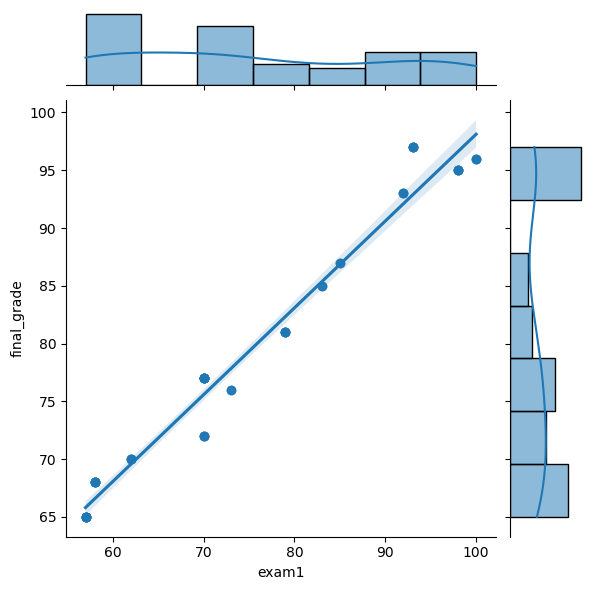

In [49]:
sns.jointplot(data=train,x='exam1',y='final_grade', kind='reg')
plt.show()

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

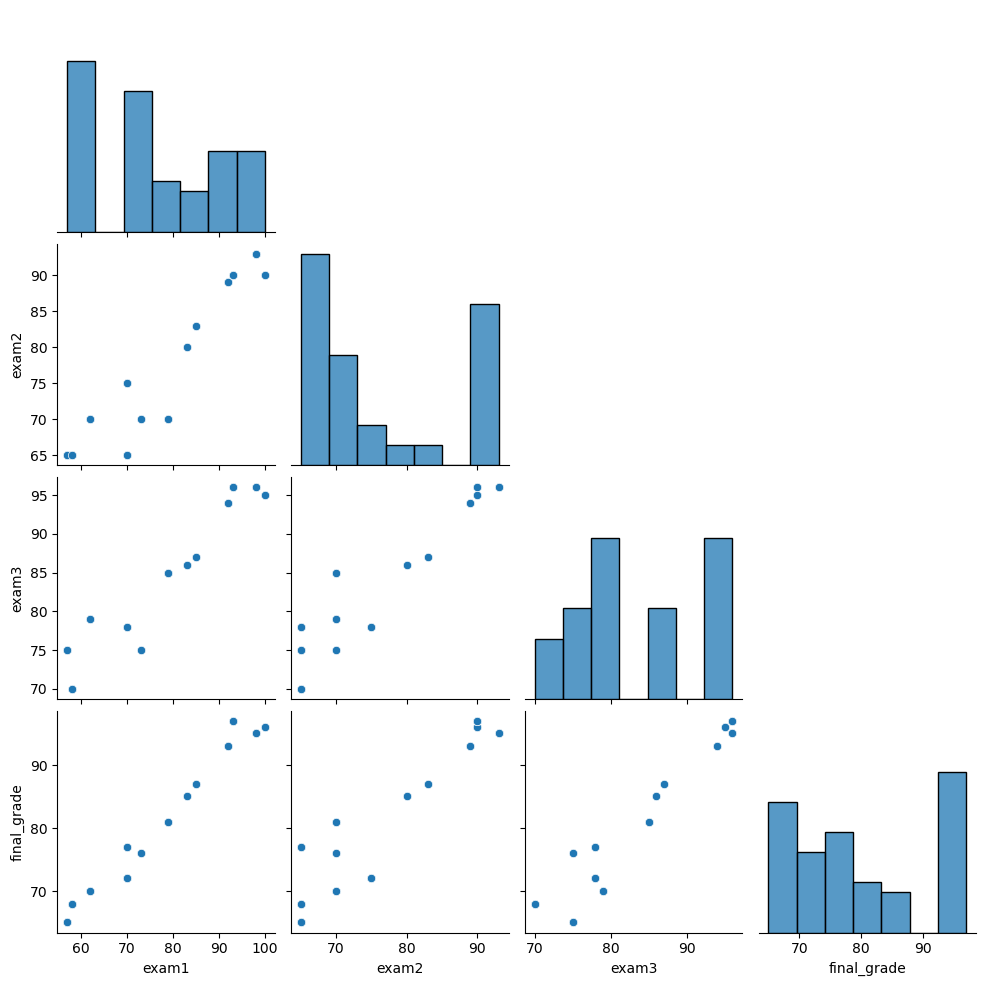

In [50]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(train.drop(columns='student_id'), corner=True)

Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [ ]:
#number of people who failed each test


### Make categorical values for further exploration

In [ ]:
#assign fail and pass for each test


### Whats the relationship between passing exam1 and the final_exam grade?

In [ ]:
#seaborn histplot 


In [ ]:
#mean final_grade by exam1 pass/fail status


### What percentage of students failed exam1 and the final?

### Of the students who failed exam1, how many also failed the final?

In [ ]:
#create subset of people who failed exam1


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed both exam1 and exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 